In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

- There are 32560 rows and 15 columns in dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- 6 numerical and 9 object columns are present

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+' : ' + str(df[column].unique()))
        print(df[column].value_counts())

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtyp

In [9]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
dtype: object

- There is no null value in data

- The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.

In [10]:
df= df.replace(' ?', np.nan)


In [11]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [12]:
# filling the missing values
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']

In [13]:
# filling null values with mode values
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object


<AxesSubplot:xlabel='Income', ylabel='count'>

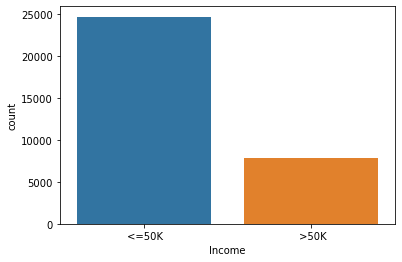

In [15]:
# Checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
print(round(income * 100, 2).astype('str') + ' %')
sns.countplot(df['Income'])

# EDA

In [16]:
dfcorr=df.corr()

<AxesSubplot:>

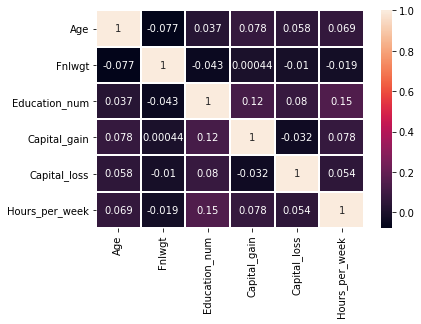

In [17]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

In [18]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='Age', ylabel='count'>

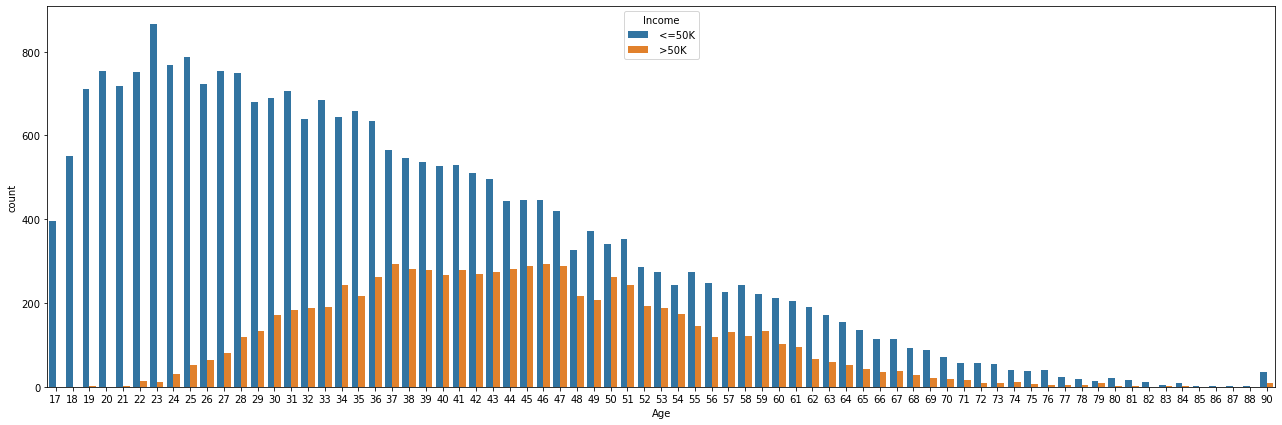

In [19]:
plt.figure(figsize=(22,7))
sns.countplot(x='Age',hue='Income',data=df)

- We can notice here in age of 17 to 30 most of people having less than 50k of income.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

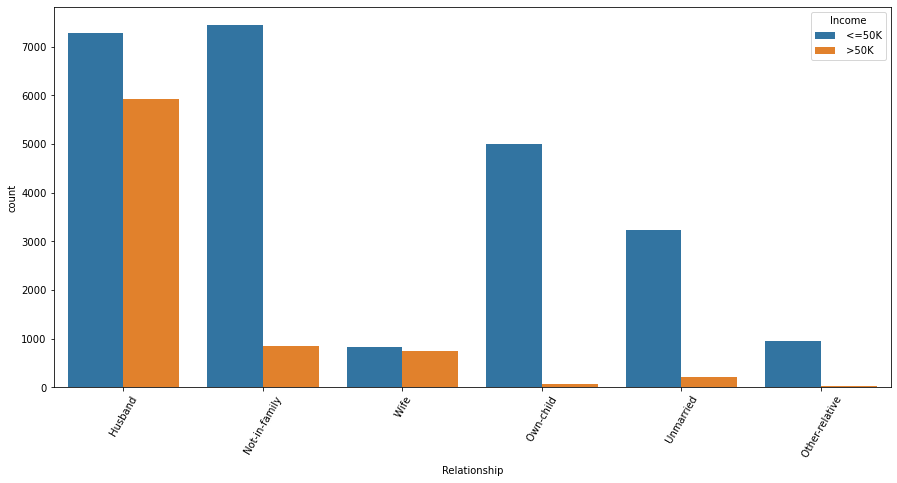

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=60)

- Only in Husband we see we have almost 6000 people having more than 50k income
- In wife we also see income is almost in both category
- In other relations we have most of people less than 50k income

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

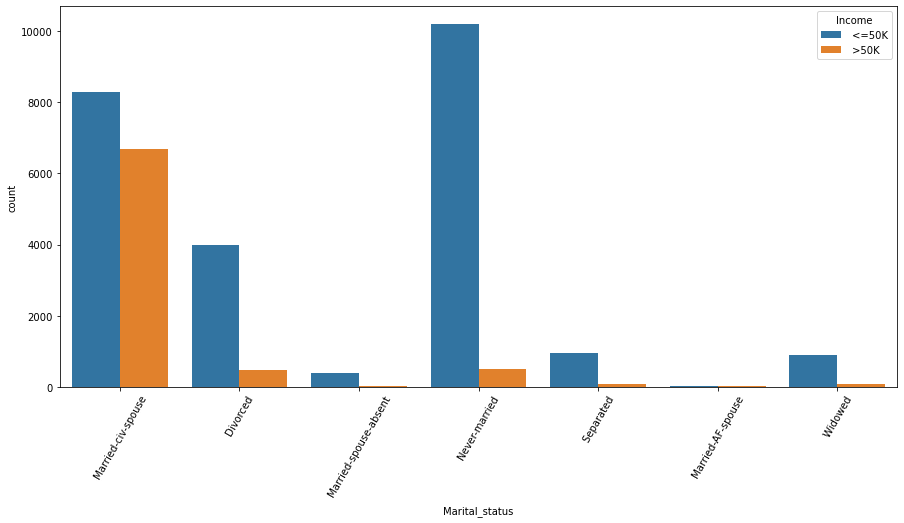

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

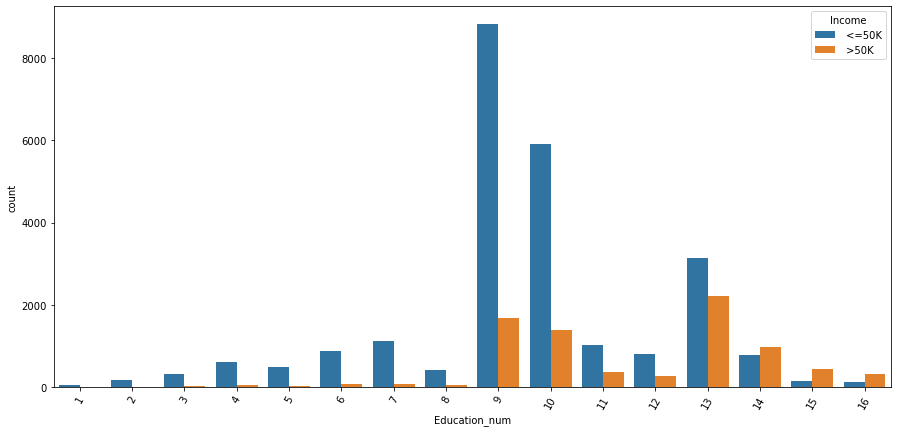

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education_num',hue='Income',data=df)
plt.xticks(rotation=60)

- We can notice here
  - when education_num is increasing we have people increasing in categories of income more than 50k

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

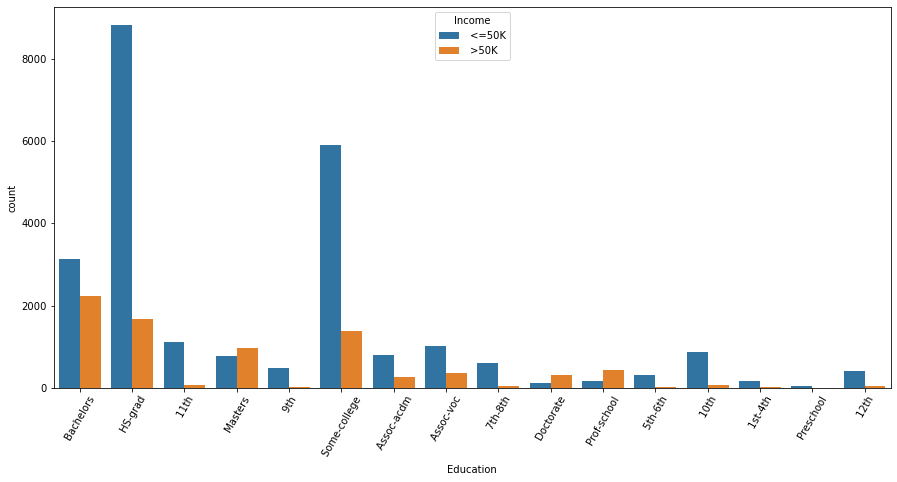

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Income',data=df)
plt.xticks(rotation=60)

- Education also having high impact on income 
  - People those having bechelors, most of them having less than 50k 
  - With HS-grad most of the people having less than 50k
  - With 11th education only few of them having more than 50k
  - With Master Education many people in income categ. more than 50k
  - With Doctorate and Prof-school most of people earning more than 50k

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

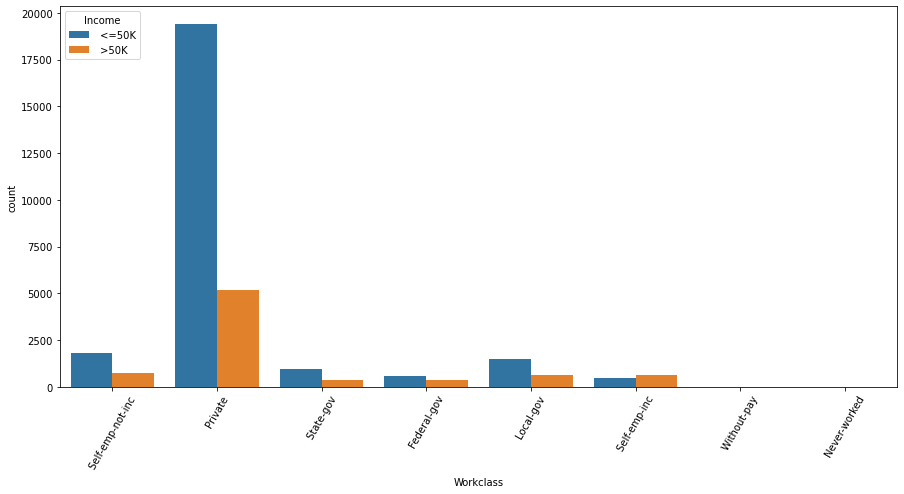

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',hue='Income',data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

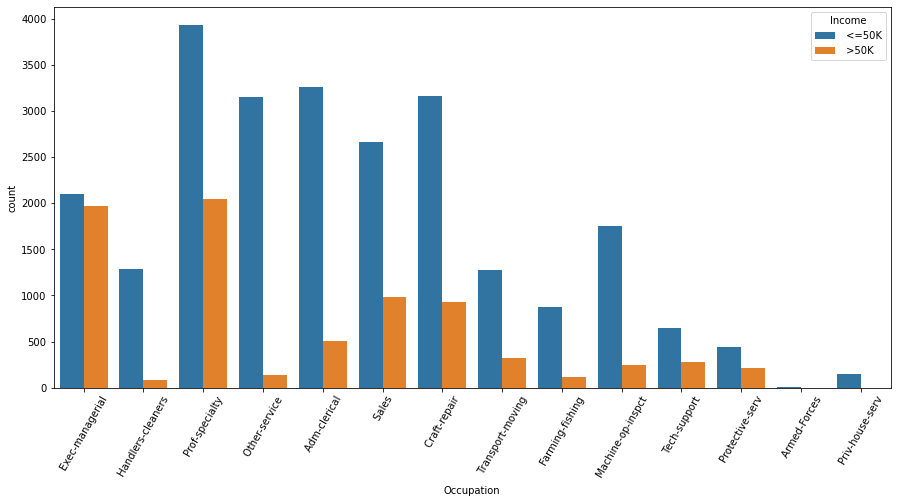

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

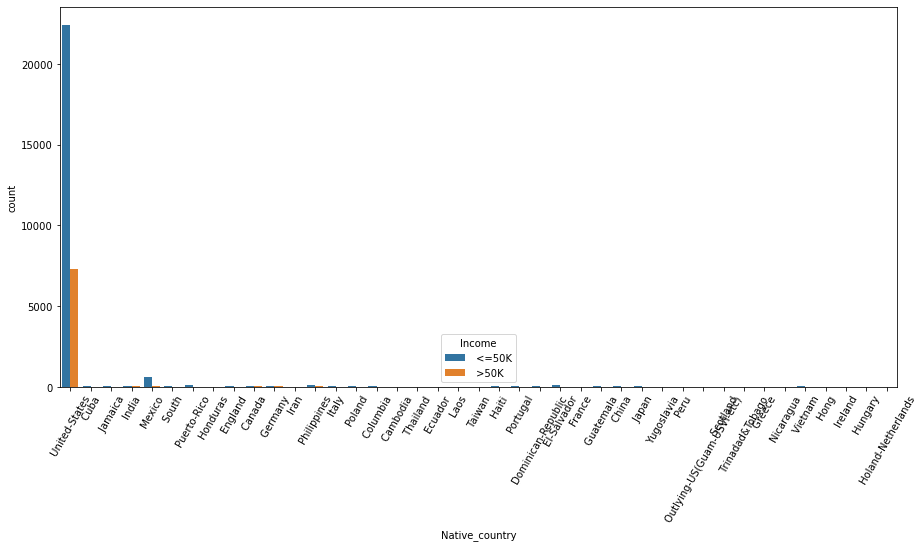

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='Native_country',hue='Income',data=df)
plt.xticks(rotation=60)

- In USA, most of people earning less then 50k

## Using LabelEncoder for convering categorical to numerical

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
categ_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


- All columns are converted into numerical now

In [33]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,1


In [34]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


# Skewness handling


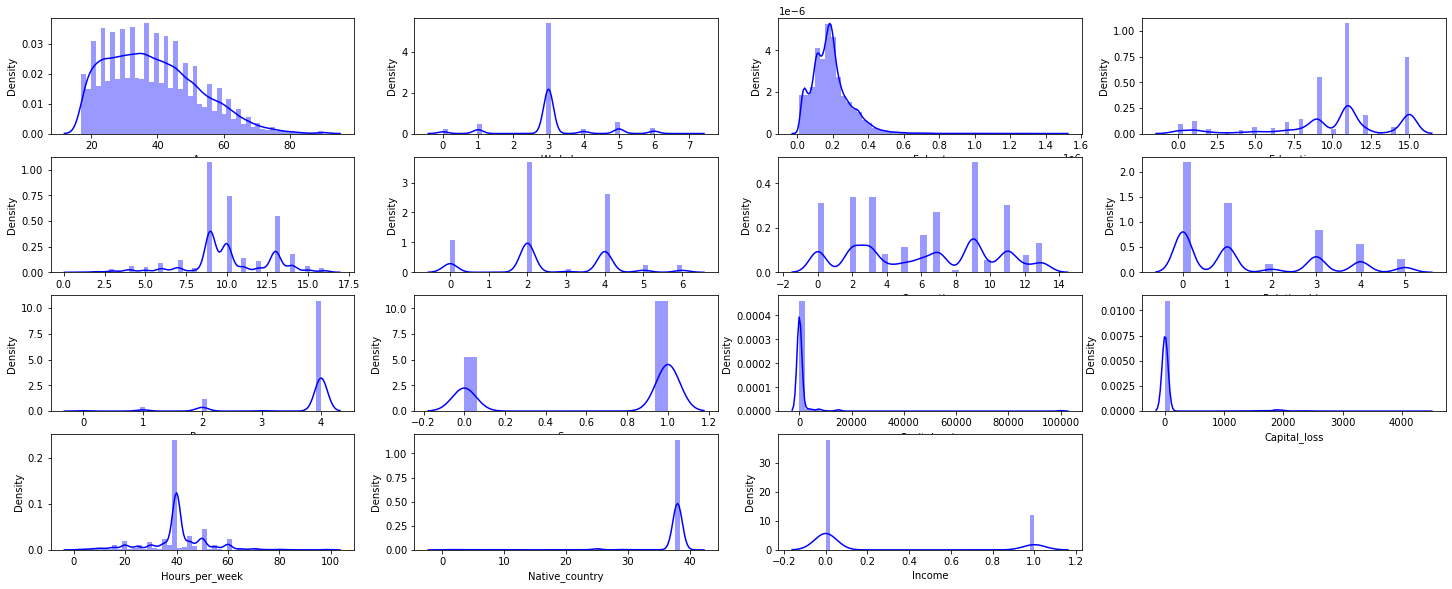

In [35]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [36]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

#### Skewness more than+/- 0.5 will we treated  
#### Object and Income columns will no be treated

 we can see here most of the columns are skewed 
##### Will only deal with below numerical columns 
- Age
- Fnlwgt
- Capital_gain
- Capital_loss


In [37]:
from sklearn.preprocessing import power_transform

df[['Age','Fnlwgt','Capital_gain','Capital_loss']]=power_transform(
    df[['Age','Fnlwgt','Capital_gain','Capital_loss']])

In [38]:
df.skew()

Age              -0.013897
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

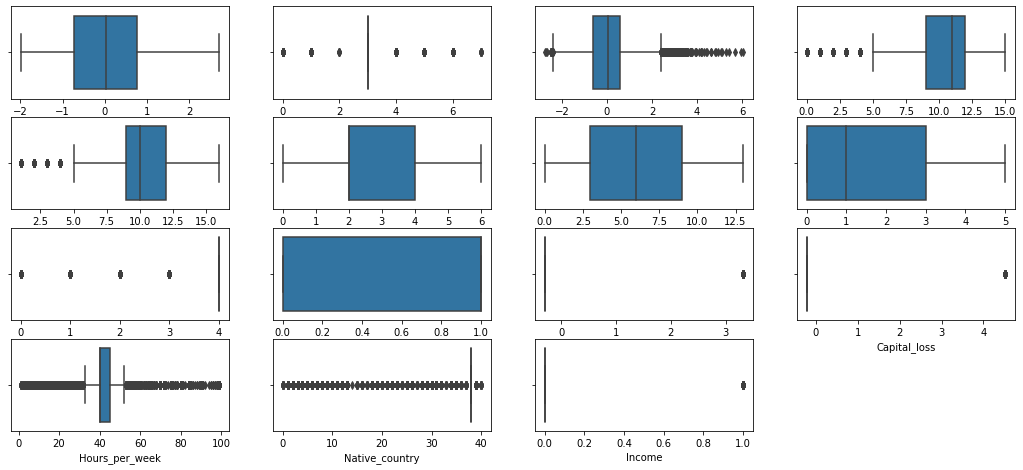

In [39]:
plt.figure(figsize=(18,18))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# outliers removal
### zscore

In [40]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [41]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (32560, 15)
After removing outliers:: (25750, 15)


## IQR

In [42]:

from scipy import stats 
IQR = stats.iqr(df) 
IQR 

9.0

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(24847, 15)


###  Choosing ZSCORE because there is huge dataloss in IQR

In [44]:
df=df_1

In [45]:
df.shape

(25750, 15)

# Dividing data into X and Y

In [46]:
x=df.drop(['Income'],axis=1)
y=df['Income']


In [47]:
x.shape

(25750, 14)

In [48]:
y.shape

(25750,)

### Scaling X values


In [49]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [50]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [51]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.000000,25750.0,25750.0,25750.000000,25750.000000
mean,0.410960,0.514136,0.455068,0.687487,0.537282,0.441392,0.468801,0.300264,0.891650,0.655029,0.0,0.0,0.488320,0.881733
std,0.213563,0.182124,0.178179,0.261703,0.184647,0.255965,0.307512,0.319276,0.307783,0.475368,0.0,0.0,0.153176,0.118871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.248293,0.500000,0.345165,0.600000,0.461538,0.333333,0.153846,0.000000,1.000000,0.000000,0.0,0.0,0.479452,0.904762
50%,0.413877,0.500000,0.467108,0.733333,0.538462,0.333333,0.461538,0.200000,1.000000,1.000000,0.0,0.0,0.493151,0.904762
75%,0.575094,0.500000,0.560184,0.800000,0.692308,0.666667,0.692308,0.600000,1.000000,1.000000,0.0,0.0,0.561644,0.904762
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


# Imbalanced learn

Using OverSamling_BorderlineSMOTE
- because there is less data in attrition for yes

<AxesSubplot:xlabel='Income', ylabel='count'>

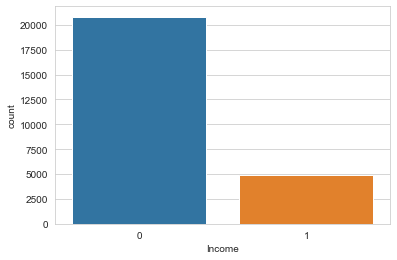

In [52]:
sns.set_style("whitegrid")
sns.countplot(x="Income", data=df)

In [53]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (25750,)
Resample Target dataset shape (41642,)


<AxesSubplot:xlabel='Income', ylabel='count'>

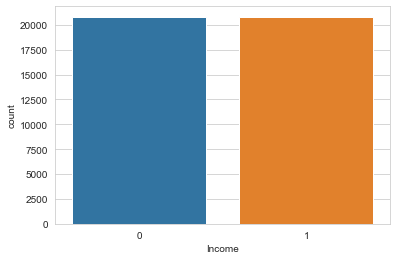

In [54]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

## Spliting Train and Test data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [57]:
x_train.shape

(30398, 14)

In [58]:
x_test.shape

(11244, 14)

In [59]:
y_train.shape

(30398,)

In [60]:
y_test.shape

(11244,)

 # MODEL BUILDING:

In [61]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [62]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


cross validation score: 0.7440322685375647


In [63]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7482212735681252
[[3961 1739]
 [1092 4452]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.74      5700
           1       0.72      0.80      0.76      5544

    accuracy                           0.75     11244
   macro avg       0.75      0.75      0.75     11244
weighted avg       0.75      0.75      0.75     11244

Training accuracy:: 0.7415290479636818
Test accuracy:: 0.7482212735681252


## DECISION TREE CLASSIFIER

In [64]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.8444153265173394


In [65]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8635716826752046
[[4895  805]
 [ 729 4815]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      5700
           1       0.86      0.87      0.86      5544

    accuracy                           0.86     11244
   macro avg       0.86      0.86      0.86     11244
weighted avg       0.86      0.86      0.86     11244

Training accuracy:: 0.999967103098888
Test accuracy:: 0.8635716826752046


## KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.8627355158399947


In [67]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.865795090715048
[[4384 1316]
 [ 193 5351]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      5700
           1       0.80      0.97      0.88      5544

    accuracy                           0.87     11244
   macro avg       0.88      0.87      0.86     11244
weighted avg       0.88      0.87      0.86     11244

Training accuracy:: 0.8936772156062899
Test accuracy:: 0.865795090715048


## RandomForestClassifier

In [68]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8912178972835327


In [69]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9083066524368553
[[4979  721]
 [ 310 5234]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      5700
           1       0.88      0.94      0.91      5544

    accuracy                           0.91     11244
   macro avg       0.91      0.91      0.91     11244
weighted avg       0.91      0.91      0.91     11244

Training accuracy:: 0.9999342061977762
Test accuracy:: 0.9083066524368553


# ENSEMBLE TECHNIQUES

## 1.ADA BOOST CLASSIFIER

In [70]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


cross validation score for Ada boost: 0.8346155234428064


In [71]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))


0.8414265385983636
[[4566 1134]
 [ 649 4895]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5700
           1       0.81      0.88      0.85      5544

    accuracy                           0.84     11244
   macro avg       0.84      0.84      0.84     11244
weighted avg       0.84      0.84      0.84     11244

Training accuracy:: 0.8297914336469504
Test accuracy:: 0.8414265385983636


## 2.BAGGING CLASSIFIER


In [72]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))


cross validation score for BAGGING Classifier: 0.8849548580239011


In [73]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.8914087513340448
[[5066  634]
 [ 587 4957]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5700
           1       0.89      0.89      0.89      5544

    accuracy                           0.89     11244
   macro avg       0.89      0.89      0.89     11244
weighted avg       0.89      0.89      0.89     11244

Training accuracy:: 0.9933548259753932
Test accuracy:: 0.8914087513340448


## 3.Gradient Boosting classifier


In [74]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8534912293447638


In [75]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))


0.8638384916399857
[[4517 1183]
 [ 348 5196]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      5700
           1       0.81      0.94      0.87      5544

    accuracy                           0.86     11244
   macro avg       0.87      0.86      0.86     11244
weighted avg       0.87      0.86      0.86     11244

Training accuracy:: 0.8581814593065333
Test accuracy:: 0.8638384916399857


#### OBSERVATION:
    We will Choose RandomForestClassifier as final model for HYPER PARAMETER TUNING 

# HYPER PARAMETER TUNING:

In [76]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}


In [77]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [78]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 12.1min finished


Accuracy after parameter tuning:: 0.9102632515119174


In [79]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 1000,
 'random_state': 10}

#### Model training with best parameters

In [80]:
best_param={
    'criterion' : ['entropy'],
    'n_estimators':[1000],
    'min_samples_split':[4],
     'random_state':[10]    }  

In [81]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [82]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min finished


Accuracy after parameter tuning:: 0.9092849519743863


#### After HYPER PARAMETER TUNING models accuracy score got increased 


## Report of RandomForestClassifier

In [83]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      5700
           1       0.88      0.95      0.91      5544

    accuracy                           0.91     11244
   macro avg       0.91      0.91      0.91     11244
weighted avg       0.91      0.91      0.91     11244



<AxesSubplot:>

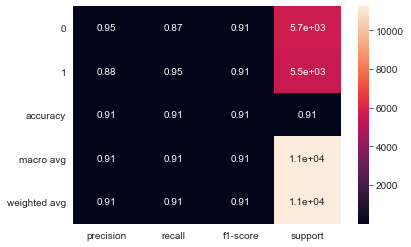

In [84]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [85]:
from sklearn.metrics import roc_auc_score

In [86]:
print("roc auc score::",roc_auc_score(y_test, best_rfc_pred))

roc auc score:: 0.9098203842940684


In [87]:
from sklearn.metrics import roc_curve

In [88]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_rfc_pred, pos_label=1)

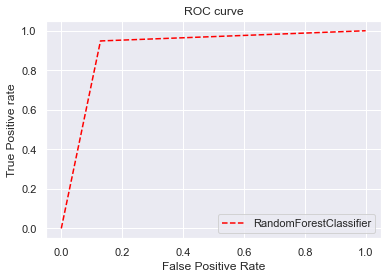

In [89]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [90]:
import joblib

In [91]:
joblib.dump(best_rfc_grid.best_estimator_,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']